In [1]:
import pandas
pandas.set_option('display.max_columns', None)
import pm4py

import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
import event_log_transformer

In [2]:
file_path = '../../../data/BPI_Challenge_2019.xes'
event_log = pm4py.read_xes(file_path)
event_log["id"] = event_log.index

/dss/dsshome1/00/ge35xof4/.local/share/virtualenvs/TaskExecutionTimeMining-fMrgpwkZ/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

In [3]:
event_log

,User,org:resource,concept:name,Cumulative net worth (EUR),time:timestamp,case:Spend area text,case:Company,case:Document Type,case:Sub spend area text,case:Purchasing Document,case:Purch. Doc. Category name,case:Vendor,case:Item Type,case:Item Category,case:Spend classification text,case:Source,case:Name,case:GR-Based Inv. Verif.,case:Item,case:concept:name,case:Goods Receipt,id
0,batch_00,batch_00,SRM: Created,298.0,2018-01-02 12:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,Purchase order,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,0
1,batch_00,batch_00,SRM: Complete,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,Purchase order,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,1
2,batch_00,batch_00,SRM: Awaiting Approval,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,Purchase order,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,2
3,batch_00,batch_00,SRM: Document Completed,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,Purchase order,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,3
4,batch_00,batch_00,SRM: In Transfer to Execution Syst.,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,Purchase order,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595918,user_603,user_603,Change Approval for Purchase Order,1385.0,2019-01-17 14:00:00+00:00,,companyID_0003,Framework order,,4508076348,Purchase order,vendorID_1974,Limit,2-way match,,sourceSystemID_0000,vendor_1898,False,00090,4508076348_00090,False,1595918
1595919,user_602,user_602,Create Purchase Order Item,1385.0,2019-01-17 13:32:00+00:00,,companyID_0003,Framework order,,4508076348,Purchase order,vendorID_1974,Limit,2-way match,,sourceSystemID_0000,vendor_1898,False,00100,4508076348_00100,False,1595919
1595920,user_603,user_603,Change Approval for Purchase Order,1385.0,2019-01-17 14:00:00+00:00,,companyID_0003,Framework order,,4508076348,Purchase order,vendorID_1974,Limit,2-way match,,sourceSystemID_0000,vendor_1898,False,00100,4508076348_00100,False,1595920
1595921,user_602,user_602,Create Purchase Order Item,1385.0,2019-01-17 13:32:00+00:00,,companyID_0003,Framework order,,4508076348,Purchase order,vendorID_1974,Limit,2-way match,,sourceSystemID_0000,vendor_1898,False,00110,4508076348_00110,False,1595921


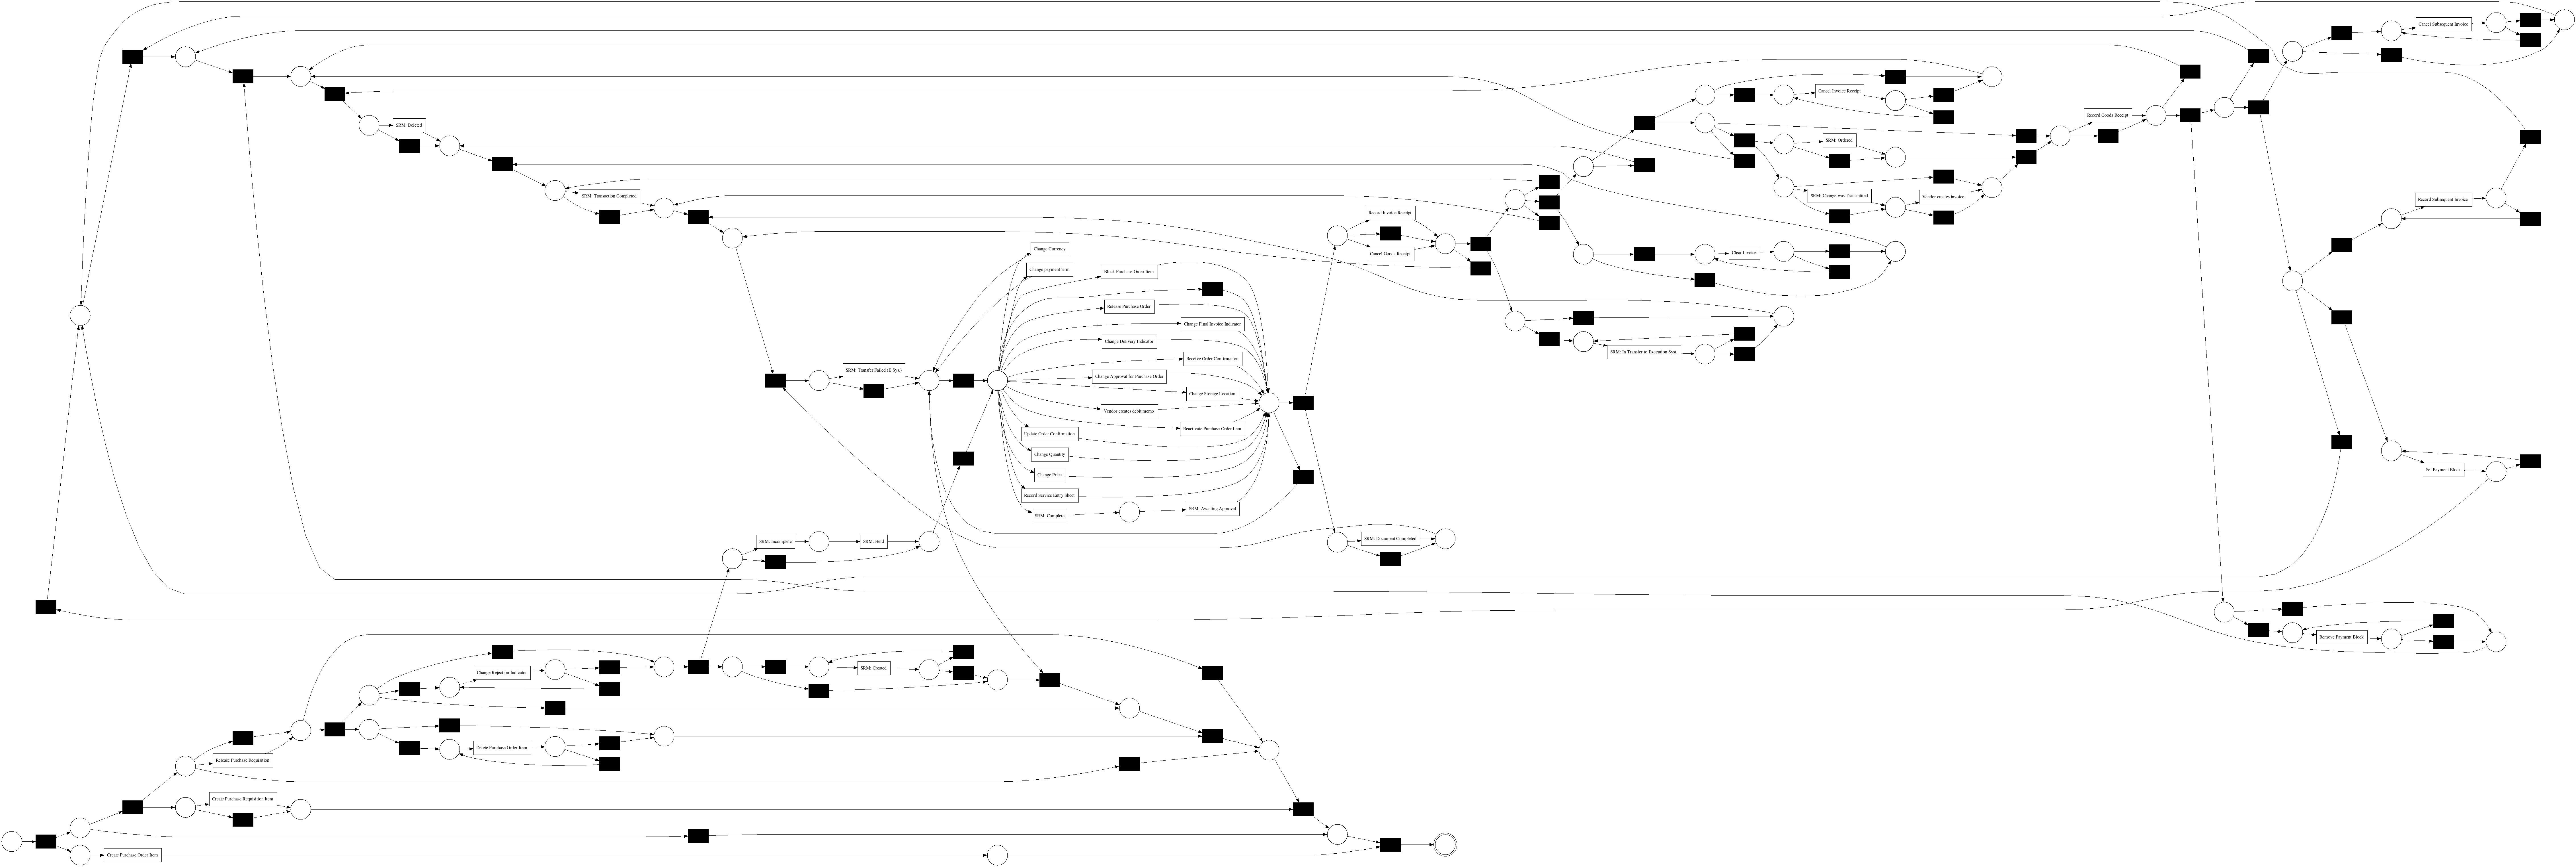

In [4]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, im, fm)

In [5]:
len(event_log['case:concept:name'].unique())

251734

In [6]:
event_log['concept:name'].unique()

array(['SRM: Created', 'SRM: Complete', 'SRM: Awaiting Approval',
       'SRM: Document Completed', 'SRM: In Transfer to Execution Syst.',
       'SRM: Ordered', 'SRM: Change was Transmitted',
       'Create Purchase Order Item', 'Vendor creates invoice',
       'Record Goods Receipt', 'Record Invoice Receipt', 'Clear Invoice',
       'Record Service Entry Sheet', 'SRM: Transfer Failed (E.Sys.)',
       'Cancel Goods Receipt', 'Vendor creates debit memo',
       'Cancel Invoice Receipt', 'Change Delivery Indicator',
       'Remove Payment Block', 'SRM: Deleted', 'Change Price',
       'Delete Purchase Order Item', 'SRM: Transaction Completed',
       'Change Quantity', 'Change Final Invoice Indicator',
       'SRM: Incomplete', 'SRM: Held', 'Receive Order Confirmation',
       'Cancel Subsequent Invoice', 'Reactivate Purchase Order Item',
       'Update Order Confirmation', 'Block Purchase Order Item',
       'Change Approval for Purchase Order', 'Release Purchase Order',
       'Recor

In [7]:
start_end_event_log = TransformEventLog.start_end_event_log_next(event_log)

In [8]:
start_end_event_log = TransformEventLog.seconds_in_day(start_end_event_log, 'time:timestamp_start')
start_end_event_log = TransformEventLog.day_of_week(start_end_event_log, 'time:timestamp_start')

In [9]:
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'concept:name_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')
start_end_event_log = event_log_transformer.TransformEventLog.value_count_per_case_without_lifecycle(start_end_event_log,
                                                             column_name = 'org:resource_start',
                                                            timestamp_name = 'time:timestamp_start',
                                                            unique_id = 'id_start')
start_end_event_log = start_end_event_log.sort_values(by='time:timestamp_start')

In [10]:
start_end_event_log

,User_start,org:resource_start,concept:name_start,Cumulative net worth (EUR)_start,time:timestamp_start,case:Spend area text_start,case:Company_start,case:Document Type_start,case:Sub spend area text_start,case:Purchasing Document_start,case:Purch. Doc. Category name_start,case:Vendor_start,case:Item Type_start,case:Item Category_start,case:Spend classification text_start,case:Source_start,case:Name_start,case:GR-Based Inv. Verif._start,case:Item_start,case:concept:name,case:Goods Receipt_start,id_start,User_complete,org:resource_complete,concept:name_complete,Cumulative net worth (EUR)_complete,time:timestamp_complete,case:Spend area text_complete,case:Company_complete,case:Document Type_complete,case:Sub spend area text_complete,case:Purchasing Document_complete,case:Purch. Doc. Category name_complete,case:Vendor_complete,case:Item Type_complete,case:Item Category_complete,case:Spend classification text_complete,case:Source_complete,case:Name_complete,case:GR-Based Inv. Verif._complete,case:Item_complete,case:Goods Receipt_complete,id_complete,duration,duration_seconds,duration_ms,duration_hours,seconds_in_day,day_of_week,Block Purchase Order Item,Cancel Goods Receipt,Cancel Invoice Receipt,Cancel Subsequent Invoice,Change Approval for Purchase Order,Change Currency,Change Delivery Indicator,Change Final Invoice Indicator,Change Price,Change Quantity,Change Rejection Indicator,Change Storage Location,Change payment term,Clear Invoice,Create Purchase Order Item,Create Purchase Requisition Item,Delete Purchase Order Item,Reactivate Purchase Order Item,Receive Order Confirmation,Record Goods Receipt,Record Invoice Receipt,Record Service Entry Sheet,Record Subsequent Invoice,Release Purchase Order,Release Purchase Requisition,Remove Payment Block,SRM: Awaiting Approval,SRM: Change was Transmitted,SRM: Complete,SRM: Created,SRM: Deleted,SRM: Document Completed,SRM: Held,SRM: In Transfer to Execution Syst.,SRM: Incomplete,SRM: Ordered,SRM: Transaction Completed,SRM: Transfer Failed (E.Sys.),Set Payment Block,Update Order Confirmation,Vendor creates debit memo,Vendor creates invoice,NONE,batch_00,batch_01,batch_02,batch_03,batch_04,batch_05,batch_06,batch_07,batch_08,batch_09,batch_10,batch_11,batch_12,batch_13,batch_14,batch_15,batch_16,batch_17,batch_18,batch_19,user_000,user_001,user_002,user_003,user_004,user_005,user_006,user_007,user_008,user_009,user_010,user_011,user_012,user_013,user_014,user_015,user_016,user_017,user_018,user_019,user_020,user_021,user_022,user_023,user_024,user_025,user_026,user_027,user_028,user_029,user_030,user_031,user_032,user_033,user_034,user_035,user_036,user_037,user_038,user_039,user_040,user_041,user_042,user_043,user_044,user_045,user_046,user_047,user_048,user_049,user_050,user_051,user_052,user_053,user_054,user_055,user_056,user_057,user_058,user_059,user_060,user_061,user_062,user_063,user_064,user_065,user_066,user_067,user_068,user_069,user_070,user_071,user_072,user_073,user_074,user_075,user_076,user_077,user_078,user_079,user_080,user_081,user_082,user_083,user_084,user_085,user_086,user_087,user_088,user_089,user_090,user_091,user_092,user_093,user_094,user_095,user_096,user_097,user_098,user_099,user_100,user_101,user_102,user_103,user_104,user_105,user_106,user_107,user_108,user_109,user_110,user_111,user_112,user_113,user_114,user_115,user_116,user_117,user_118,user_119,user_120,user_121,user_122,user_123,user_124,user_125,user_126,user_127,user_128,user_129,user_130,user_131,user_132,user_133,user_134,user_135,user_136,user_137,user_138,user_139,user_140,user_141,user_142,user_143,user_144,user_145,user_146,user_147,user_148,user_149,user_150,user_151,user_152,user_153,user_154,user_155,user_156,user_157,user_158,user_159,user_160,user_161,user_162,user_163,user_164,user_165,user_166,user_167,user_168,user_169,user_170,user_171,user_172,user_173,user_174,user_175,user_176,user_177,user_178,user_179,user_180,user_181,user_182,user_183,user_184,user_185,user_186,user_187,user_188

In [11]:
train, test = pm4py.ml.split_train_test(start_end_event_log)

In [12]:
train.shape

(1062120, 711)

In [13]:
test.shape

(262738, 711)

In [14]:
train.to_csv('../transformed_event_logs/BPIC_2019_start_end_train.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
train.to_pickle('../transformed_event_logs/BPIC_2019_start_end_train.pickle')

In [15]:
test.to_csv('../transformed_event_logs/BPIC_2019_start_end_test.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
test.to_pickle('../transformed_event_logs/BPIC_2019_start_end_test.pickle')